<a href="https://colab.research.google.com/github/santiagoahl/RNA-taxonomy-prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#         **RNA taxonomy identification using Markov Chains**

![screenshot](https://camo.githubusercontent.com/4484139e1a8fef2c18571591696eac8ab43c3cb579b9ed95a6f1a6173f7d0538/68747470733a2f2f696d616765732e756e73706c6173682e636f6d2f70686f746f2d313634333738303636383930392d3538303832323433303135353f69786c69623d72622d312e322e3126697869643d4d6e77784d6a4133664442384d48787761473930627931775957646c66487838664756756644423866487838266175746f3d666f726d6174266669743d63726f7026773d3230363426713d3830)

- Ahumada Santiago
- Aldana Jefferson
- Sanchez Jorge
- Reina Carlos

>[RNA taxonomy identification using Markov Chains](#scrollTo=gINvgBxRW78W)

>[Libraries & Modules](#scrollTo=VFc9ZwgmW78b)

>[Data import](#scrollTo=1H8tdfrlW78c)

>[Dataset visualization](#scrollTo=6xbsPJlQW78g)

>[Codons handling](#scrollTo=x5TAu7ZAW78i)

>[Markov Model](#scrollTo=SnKnLz4rW78j)

>>[Splitting data into taxonomies](#scrollTo=dFaRPJo-6CL6)

>>[Transition matrices](#scrollTo=Bs2JV5Xj6GYh)

>>[Markov Chain Viz](#scrollTo=W7L8WQQaMfZv)

>[New Dataset](#scrollTo=Qf8wrPrl9Rxt)

>>[New dataset Normalization](#scrollTo=8GV8ryLxbKmZ)

>>[Data viz](#scrollTo=1KMLEnLeiyaD)

>[Random Forest Model](#scrollTo=XMTPGOM8XdQs)

>>[Training](#scrollTo=VZagRDcg1pFK)

>>[Testing](#scrollTo=Cqte9ftKvs2h)

>[Results](#scrollTo=tffdQr31qJbK)

>>[Cross Validation](#scrollTo=sLO5dTYIxrTY)

>>[Confusion Matrix](#scrollTo=dBYn7NWrW-bB)

>[Model export](#scrollTo=Kx0koTYOvvgF)

>[Model import](#scrollTo=Ivb-R2d00_d5)

>[Make Predictions](#scrollTo=c8B893NFq1GI)



# Libraries & Modules

In [ ]:
# Libraries

  # Data manipulation
import numpy as np 
from scipy.sparse import csr_matrix
import pandas as pd 
from random import choice 

  #Data-viz 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx 

  # Scikit-Learn 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

  # File handling 
import pickle
import json
import joblib
from google.colab import drive
import warnings

In [ ]:
warnings.filterwarnings('ignore') 

In [ ]:
drive.mount('/content/drive')
#drive.flush_and_unmount()

In [ ]:
#Modules 

%run "/content/drive/MyDrive/Grupo-ai-Medicos/Notebook/functions.py"
%run "/content/drive/MyDrive/Grupo-ai-Medicos/Notebook/matrix_norms.py"
%run "/content/drive/MyDrive/Grupo-ai-Medicos/Notebook/model_viz.py"

# Data import

In [ ]:
path = '/content/drive/MyDrive/Grupo-ai-Medicos/Dataset/secuencias.csv'

In [ ]:
df_names = ['Taxonomy', 'Sequence']

In [ ]:
csv = pd.read_csv(path,header=0,names=df_names)

In [ ]:
df_sequences = pd.DataFrame(csv)
df_sequences

Taxonomy                                           Sequence
0     Orthomyxoviridae  AGCAATCACAATCTCTTAACCAGTTAAAATGTCATTTGAGGCATAC...
1     Orthomyxoviridae  AGCAATCACAATCTCTTCACTCTTCAATTTGTTCGATGGCCCAATT...
2     Orthomyxoviridae  AGCAATCACATCTCACATTTCGTCTAAATTTGTCTAGTTGAACCCG...
3     Orthomyxoviridae  AGCAATCACATTCTCTTTTCCTTAACAATGATTGTCTTGTGCTTAC...
4     Orthomyxoviridae  AGCAATCACAGCTCAGTGATCGAGACAATTAAACATTCCAACCATG...
...                ...                                                ...
4995     Coronaviridae  ACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACT...
4996     Coronaviridae  ACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACT...
4997     Coronaviridae  ACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACT...
4998     Coronaviridae  CCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTT...
4999     Coronaviridae  ACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACT...

[5000 rows x 2 columns]

In [ ]:
taxonomies = df_sequences['Taxonomy'].drop_duplicates()
print(len(taxonomies))

19


In [ ]:
taxonomies.to_csv('/content/drive/MyDrive/Grupo-ai-Medicos/Results/Taxonomies.csv')

In [ ]:
print(len(df['Sequence'][3400]))

29823


In [ ]:
total = np.sum([len(df['Sequence'][i]) for i in range(len(df_sequences))])//len(df_sequences)
print(total)

16544


In [ ]:
len(df_sequences)

5000

# Dataset visualization

In [ ]:
x = ['T', 'G', 'A', 'C']

In [ ]:
def contar(table):
    nT = 0
    nG = 0
    nA = 0
    nC = 0
    for row in table.index:
        nT += table['Sequence'][row].count("T")
        nG += table['Sequence'][row].count("G")
        nA += table['Sequence'][row].count("A")
        nC += table['Sequence'][row].count("C")

    count = [nT, nG, nA, nC]
    return count

In [ ]:
def hist(count):
    plt.figure(figsize=(5,3))
    plt.bar(x, count, color='red')
    plt.show()

In [ ]:
contar(df[df['Taxonomy']=='Orthomyxoviridae'])

[108526, 109855, 153348, 84105]

In [ ]:
table = df[df['Taxonomy']=='Orthomyxoviridae']
print(table.index[13])

138


In [ ]:
taxonomies = df['Taxonomy'].drop_duplicates()
list(taxonomies)

['Orthomyxoviridae',
 'Rhabdoviridae',
 'Arteriviridae',
 'Coronaviridae',
 'Reoviridae',
 'Caliciviridae',
 'Phenuiviridae',
 'Hantaviridae',
 'Picornaviridae',
 'Betaflexiviridae',
 'Astroviridae',
 'Closteroviridae',
 'Flaviviridae',
 'Potyviridae',
 'Retroviridae',
 'Togaviridae',
 'Paramyxoviridae',
 'Hepeviridae',
 'Pneumoviridae']

In [ ]:
tables = [df[df['Taxonomy']==taxonomy] for taxonomy in taxonomies]
tables;

In [ ]:
for table in tables:
    print(table['Taxonomy'].head(1))
    count = contar(table)
    hist(count)

# Codons handling

In [ ]:
codon_data = []

for chain in df_sequences['Sequence']:
    codons = compute_codons(chain)
    codon_data.append(codons)

In [ ]:
pd.Series(codon_data[0])

In [ ]:
codons = list(set(codon_data[0]))
codons

In [ ]:
print(len(list(set(codon_data[1000]))))

64


In [ ]:
def contar_codons(table, codons):
    counts = [0]*len(codons)
    for row in table.index:
      for j in range(len(codons)):
        codon = codons[j]
        counts[j] += table['Sequence'][row].count(codon)
    return counts

In [ ]:
def hist(x, count, name):
    plt.style.use('bmh')
    plt.figure(figsize=(7, 15))
    plt.title(name, color='yellow')
    plt.xlabel('Frequency', color='yellow')
    plt.ylabel('Codon', color='yellow')
    plt.tick_params(axis="x", colors="#5DCD99")      # x tick labels
    plt.tick_params(axis="y", colors="#5DCD99") 
    plt.barh(x, count, color='#24AA6B', edgecolor='blue')
    plt.show()

In [ ]:
contar(df[df['Taxonomy']=='Orthomyxoviridae'])

[108526, 109855, 153348, 84105]

In [ ]:
table = df[df['Taxonomy']=='Orthomyxoviridae']
print(table.index[13])

138


In [ ]:
taxonomies = df['Taxonomy'].drop_duplicates()
taxonomies[0]

'Orthomyxoviridae'

In [ ]:
tables = [df[df['Taxonomy']==taxonomy] for taxonomy in taxonomies]
tables;

In [ ]:
for taxonomy in taxonomies:
    table = df[df['Taxonomy']==taxonomy]
    name = taxonomy
    count = contar_codons(table, codons)
    hist(codons, count, name)

In [ ]:
df_sequences['Codons'] = codon_data

In [ ]:
df_sequences.head(5)

Taxonomy                                           Sequence  \
0  Orthomyxoviridae  AGCAATCACAATCTCTTAACCAGTTAAAATGTCATTTGAGGCATAC...   
1  Orthomyxoviridae  AGCAATCACAATCTCTTCACTCTTCAATTTGTTCGATGGCCCAATT...   
2  Orthomyxoviridae  AGCAATCACATCTCACATTTCGTCTAAATTTGTCTAGTTGAACCCG...   
3  Orthomyxoviridae  AGCAATCACATTCTCTTTTCCTTAACAATGATTGTCTTGTGCTTAC...   
4  Orthomyxoviridae  AGCAATCACAGCTCAGTGATCGAGACAATTAAACATTCCAACCATG...   

                                              Codons  
0  [AGC, AAT, CAC, AAT, CTC, TTA, ACC, AGT, TAA, ...  
1  [AGC, AAT, CAC, AAT, CTC, TTC, ACT, CTT, CAA, ...  
2  [AGC, AAT, CAC, ATC, TCA, CAT, TTC, GTC, TAA, ...  
3  [AGC, AAT, CAC, ATT, CTC, TTT, TCC, TTA, ACA, ...  
4  [AGC, AAT, CAC, AGC, TCA, GTG, ATC, GAG, ACA, ...

# Markov Model

## Splitting data into taxonomies

In [ ]:
tax_data, cod_data = {}, {}

In [ ]:
for taxonomy in taxonomies:
  tax_data[taxonomy], cod_data[taxonomy] = get_data(taxonomy, df_sequences)

In [ ]:
nucleotids = ['A', 'C', 'G', 'T']

In [ ]:
codons = [str(i)+str(j)+str(j) for i in nucleotids for j in nucleotids for k in nucleotids]

## Transition matrices

In [ ]:
matrices_dataset = {}
t=1
for taxonomy in taxonomies:
  print(t,'\n')
  t=t+1
  data = tax_data[taxonomy]
  codons = cod_data[taxonomy]
  matrices_dataset[taxonomy] = taxonomy_transition_matrices(data, codons)

In [ ]:
with open('matrices_dataset.pkl', 'wb') as f:
    pickle.dump(matrices_dataset, f)

In [ ]:
list_matrices = {}
for tax in taxonomies:
  list_matrices[tax] = [matrix.tolist() for matrix in matrices_dataset[tax]]

In [ ]:
with open('matrices_dataset.json', 'w') as fp:
    json.dump(list_matrices, fp)

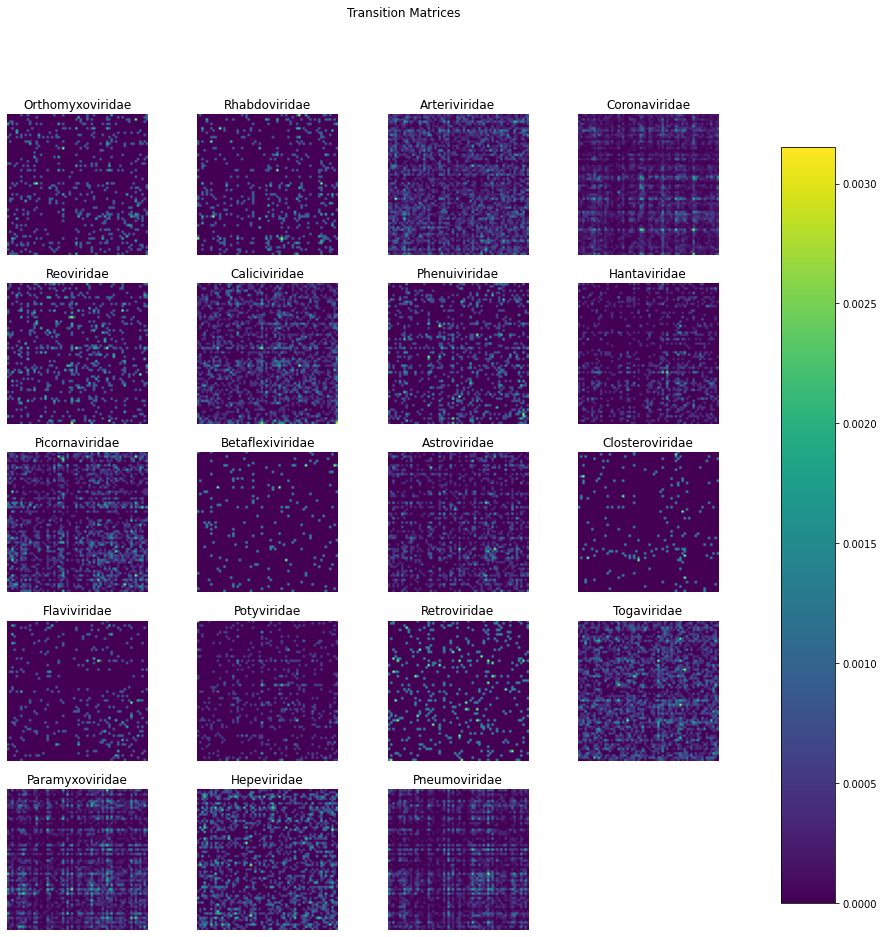

In [ ]:
plot_tr_matrices(new_data) # new_data is defined in the following code cell 

## Markov Chain Viz

In [ ]:
matrix_example = pd.crosstab(new_data['Orthomyxoviridae'][0], columns=codons)

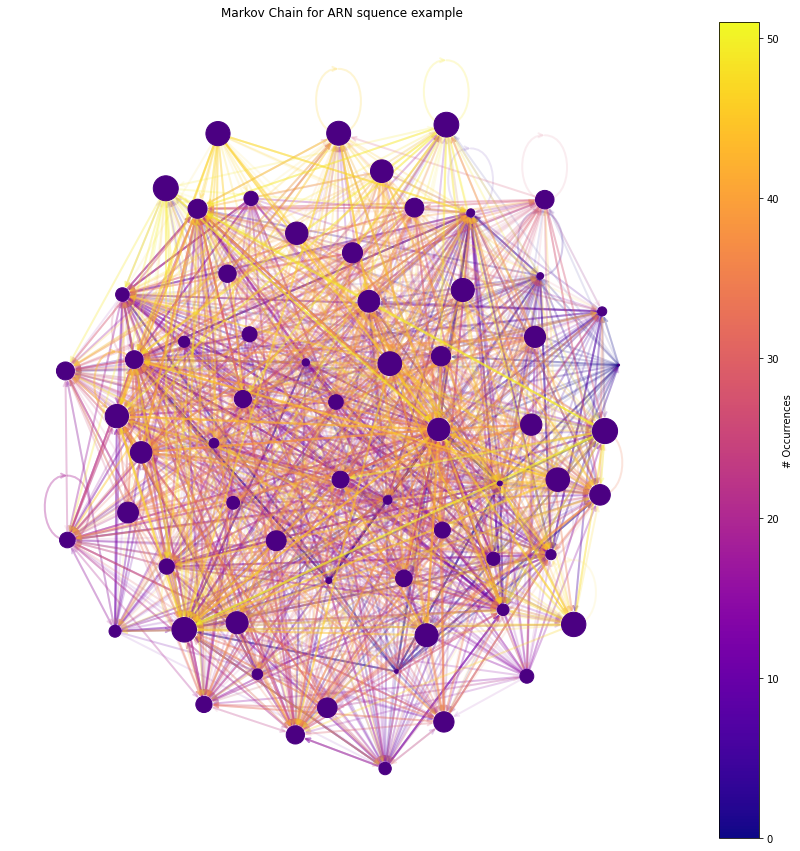

In [ ]:
plot_markov_chain(matrix_example)

# New Dataset 


In [ ]:
with open('/content/drive/MyDrive/Grupo-ai-Medicos/Results/matrices_dataset.json') as file:
    new_data = json.load(file)
#new_data = normalize_data(new_data, 0, 0.0232)

In [ ]:
new_dict = {}

In [ ]:
for key in new_data.keys():
  new_dict[key] = metrics(new_data[key])

In [ ]:
df = pd.DataFrame(columns=['Frobenius Norm', 'Nuclear Norm', 'Infty Norm', 'Neg Infty Norm', 'Neg L1 Norm', 'L1 Norm', 'Neg L2 Norm', 'L2 Norm']+['eig '+str(i+1) for i in range(10)]+['Taxonomy'])

In [ ]:
for taxonomy in taxonomies:
  for j in range(len(new_dict[taxonomy])):
    new_row = new_dict[taxonomy][j]+[taxonomy]
    df.loc[len(df)] = new_row

In [ ]:
tax_col = df['Taxonomy']

In [ ]:
tax_col

0       Orthomyxoviridae
1       Orthomyxoviridae
2       Orthomyxoviridae
3       Orthomyxoviridae
4       Orthomyxoviridae
              ...       
4995       Pneumoviridae
4996       Pneumoviridae
4997       Pneumoviridae
4998       Pneumoviridae
4999       Pneumoviridae
Name: Taxonomy, Length: 5000, dtype: object

In [ ]:
df.to_csv('/content/drive/MyDrive/Grupo-ai-Medicos/Dataset/new_data.csv')

In [ ]:
df.head()

Frobenius Norm  Nuclear Norm  Infty Norm  Neg Infty Norm  Neg L1 Norm  \
0        1.788372     10.166032    2.415511        0.053678     0.053678   
1        1.753827     10.266756    1.949402        0.108300     0.108300   
2        2.014137     11.945518    1.935561        0.000000     0.000000   
3        2.022085     11.985094    1.602359        0.000000     0.000000   
4        3.305386     20.800448    1.993223        0.000000     0.000000   

    L1 Norm   Neg L2 Norm   L2 Norm     eig 1     eig 2     eig 3     eig 4  \
0  2.415511  9.216497e-04  1.008877  0.007231  0.015300  0.015300  0.020864   
1  1.949402  2.701283e-05  0.980939  0.001386  0.007452  0.010456  0.010456   
2  1.935561  3.214702e-18  0.971374  0.000000  0.016957  0.016957  0.017012   
3  1.602359  3.544304e-18  0.953578  0.000000  0.000000  0.000000  0.011503   
4  1.993223  1.831376e-18  1.035848  0.000000  0.000000  0.000000  0.000000   

      eig 5         eig 6         eig 7         eig 8     eig 9    eig 10  \
0  0.026416  3.210225e-02  3.210225e-02  3.233439e-02  0.032334  0.043790   
1  0.018331  2.637330e-02  4.064168e-02  4.064168e-02  0.043808  0.048709   
2  0.017012  2.462541e-02  2.462541e-02  3.644598e-02  0.036446  0.049043   
3  0.011503  1.631025e-02  1.631025e-02  2.680638e-02  0.026806  0.032782   
4  0.000000  1.395865e-16  1.968035e-09  1.968035e-09  0.084056  0.084056   

           Taxonomy  
0  Orthomyxoviridae  
1  Orthomyxoviridae  
2  Orthomyxoviridae  
3  Orthomyxoviridae  
4  Orthomyxoviridae

## New dataset Normalization

In [ ]:
df_num = df[['Frobenius Norm', 'Nuclear Norm', 'Infty Norm', 'Neg Infty Norm', 'Neg L1 Norm', 'L1 Norm', 'Neg L2 Norm', 'L2 Norm']+['eig '+str(i+1) for i in range(10)]]


In [ ]:
scaler = MinMaxScaler()

In [ ]:
df = pd.DataFrame(scaler.fit_transform(df_num), columns=['Frobenius Norm', 'Nuclear Norm', 'Infty Norm', 'Neg Infty Norm', 'Neg L1 Norm', 'L1 Norm', 'Neg L2 Norm', 'L2 Norm']+['eig '+str(i+1) for i in range(10)])
df['Taxonomy'] = tax_col

In [ ]:
scaler.data_max_

array([3.43741890e+00, 2.10976203e+01, 4.55665025e+00, 3.73154131e-01,
       3.73154131e-01, 4.55665025e+00, 6.09212829e-03, 1.83130135e+00,
       2.93818320e-02, 3.68116170e-02, 6.25110435e-02, 6.25110435e-02,
       7.39450659e-02, 9.67528899e-02, 9.67528899e-02, 1.00604059e-01,
       1.00604059e-01, 1.04286095e-01])

In [ ]:
df

Frobenius Norm  Nuclear Norm  Infty Norm  Neg Infty Norm  Neg L1 Norm  \
0           0.350555      0.371094    0.381855        0.143849     0.143849   
1           0.336950      0.376888    0.247290        0.290229     0.290229   
2           0.439468      0.473469    0.243294        0.000000     0.000000   
3           0.442598      0.475746    0.147099        0.000000     0.000000   
4           0.948002      0.982903    0.259941        0.000000     0.000000   
...              ...           ...         ...             ...          ...   
4995        0.118748      0.055127    0.324599        0.022765     0.045531   
4996        0.056282      0.064575    0.050719        0.093135     0.093135   
4997        0.110210      0.062396    0.340481        0.022892     0.022892   
4998        0.116887      0.060596    0.356349        0.068282     0.068282   
4999        0.120758      0.061378    0.325990        0.022815     0.022815   

       L1 Norm   Neg L2 Norm   L2 Norm     eig 1     eig 2     eig 3  \
0     0.381855  1.512853e-01  0.246963  0.246101  0.415639  0.244762   
1     0.247290  4.434055e-03  0.221382  0.047178  0.202435  0.167272   
2     0.243294  5.276812e-16  0.212624  0.000000  0.460631  0.271257   
3     0.147099  5.817842e-16  0.196329  0.000000  0.000000  0.000000   
4     0.259941  3.006136e-16  0.271658  0.000000  0.000000  0.000000   
...        ...           ...       ...       ...       ...       ...   
4995  0.324599  1.363699e-02  0.267808  0.005136  0.052004  0.050125   
4996  0.050719  7.859566e-02  0.077578  0.080684  0.064399  0.114078   
4997  0.340481  3.278303e-02  0.230539  0.018842  0.035226  0.020744   
4998  0.356349  2.681549e-02  0.254654  0.031805  0.047728  0.044839   
4999  0.325990  3.422163e-02  0.264595  0.013927  0.073304  0.064443   

         eig 4     eig 5         eig 6         eig 7         eig 8     eig 9  \
0     0.333769  0.357234  3.317963e-01  3.317963e-01  3.214024e-01  0.321402   
1     0.167272  0.247896  2.725841e-01  4.200565e-01  4.039766e-01  0.435445   
2     0.272141  0.230061  2.545186e-01  2.545186e-01  3.622715e-01  0.362271   
3     0.184010  0.155557  1.685764e-01  1.685764e-01  2.664542e-01  0.266454   
4     0.000000  0.000000  1.442712e-15  2.034083e-08  1.956218e-08  0.835512   
...        ...       ...           ...           ...           ...       ...   
4995  0.050125  0.066592  5.232386e-02  5.232386e-02  1.034649e-01  0.103465   
4996  0.114078  0.119496  9.132659e-02  1.620904e-01  1.630157e-01  0.172962   
4997  0.037343  0.031569  6.768177e-02  6.768177e-02  1.176281e-01  0.117628   
4998  0.044839  0.067191  5.135181e-02  8.190038e-02  7.876519e-02  0.152477   
4999  0.064443  0.079089  7.331560e-02  7.331560e-02  1.029934e-01  0.120891   

        eig 10          Taxonomy  
0     0.419899  Orthomyxoviridae  
1     0.467070  Orthomyxoviridae  
2     0.470271  Orthomyxoviridae  
3     0.314346  Orthomyxoviridae  
4     0.806013  Orthomyxoviridae  
...        ...               ...  
4995  0.102067     Pneumoviridae  
4996  0.186222     Pneumoviridae  
4997  0.145668     Pneumoviridae  
4998  0.147093     Pneumoviridae  
4999  0.116623     Pneumoviridae  

[5000 rows x 19 columns]

In case you have dowloaded the data previously:

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Grupo-ai-Medicos/Dataset/new_data.csv')

## Data viz

Se contrastó la distribución de los datos de todas las métricas matriciales. Cada color corresponde a una taxonomía. 

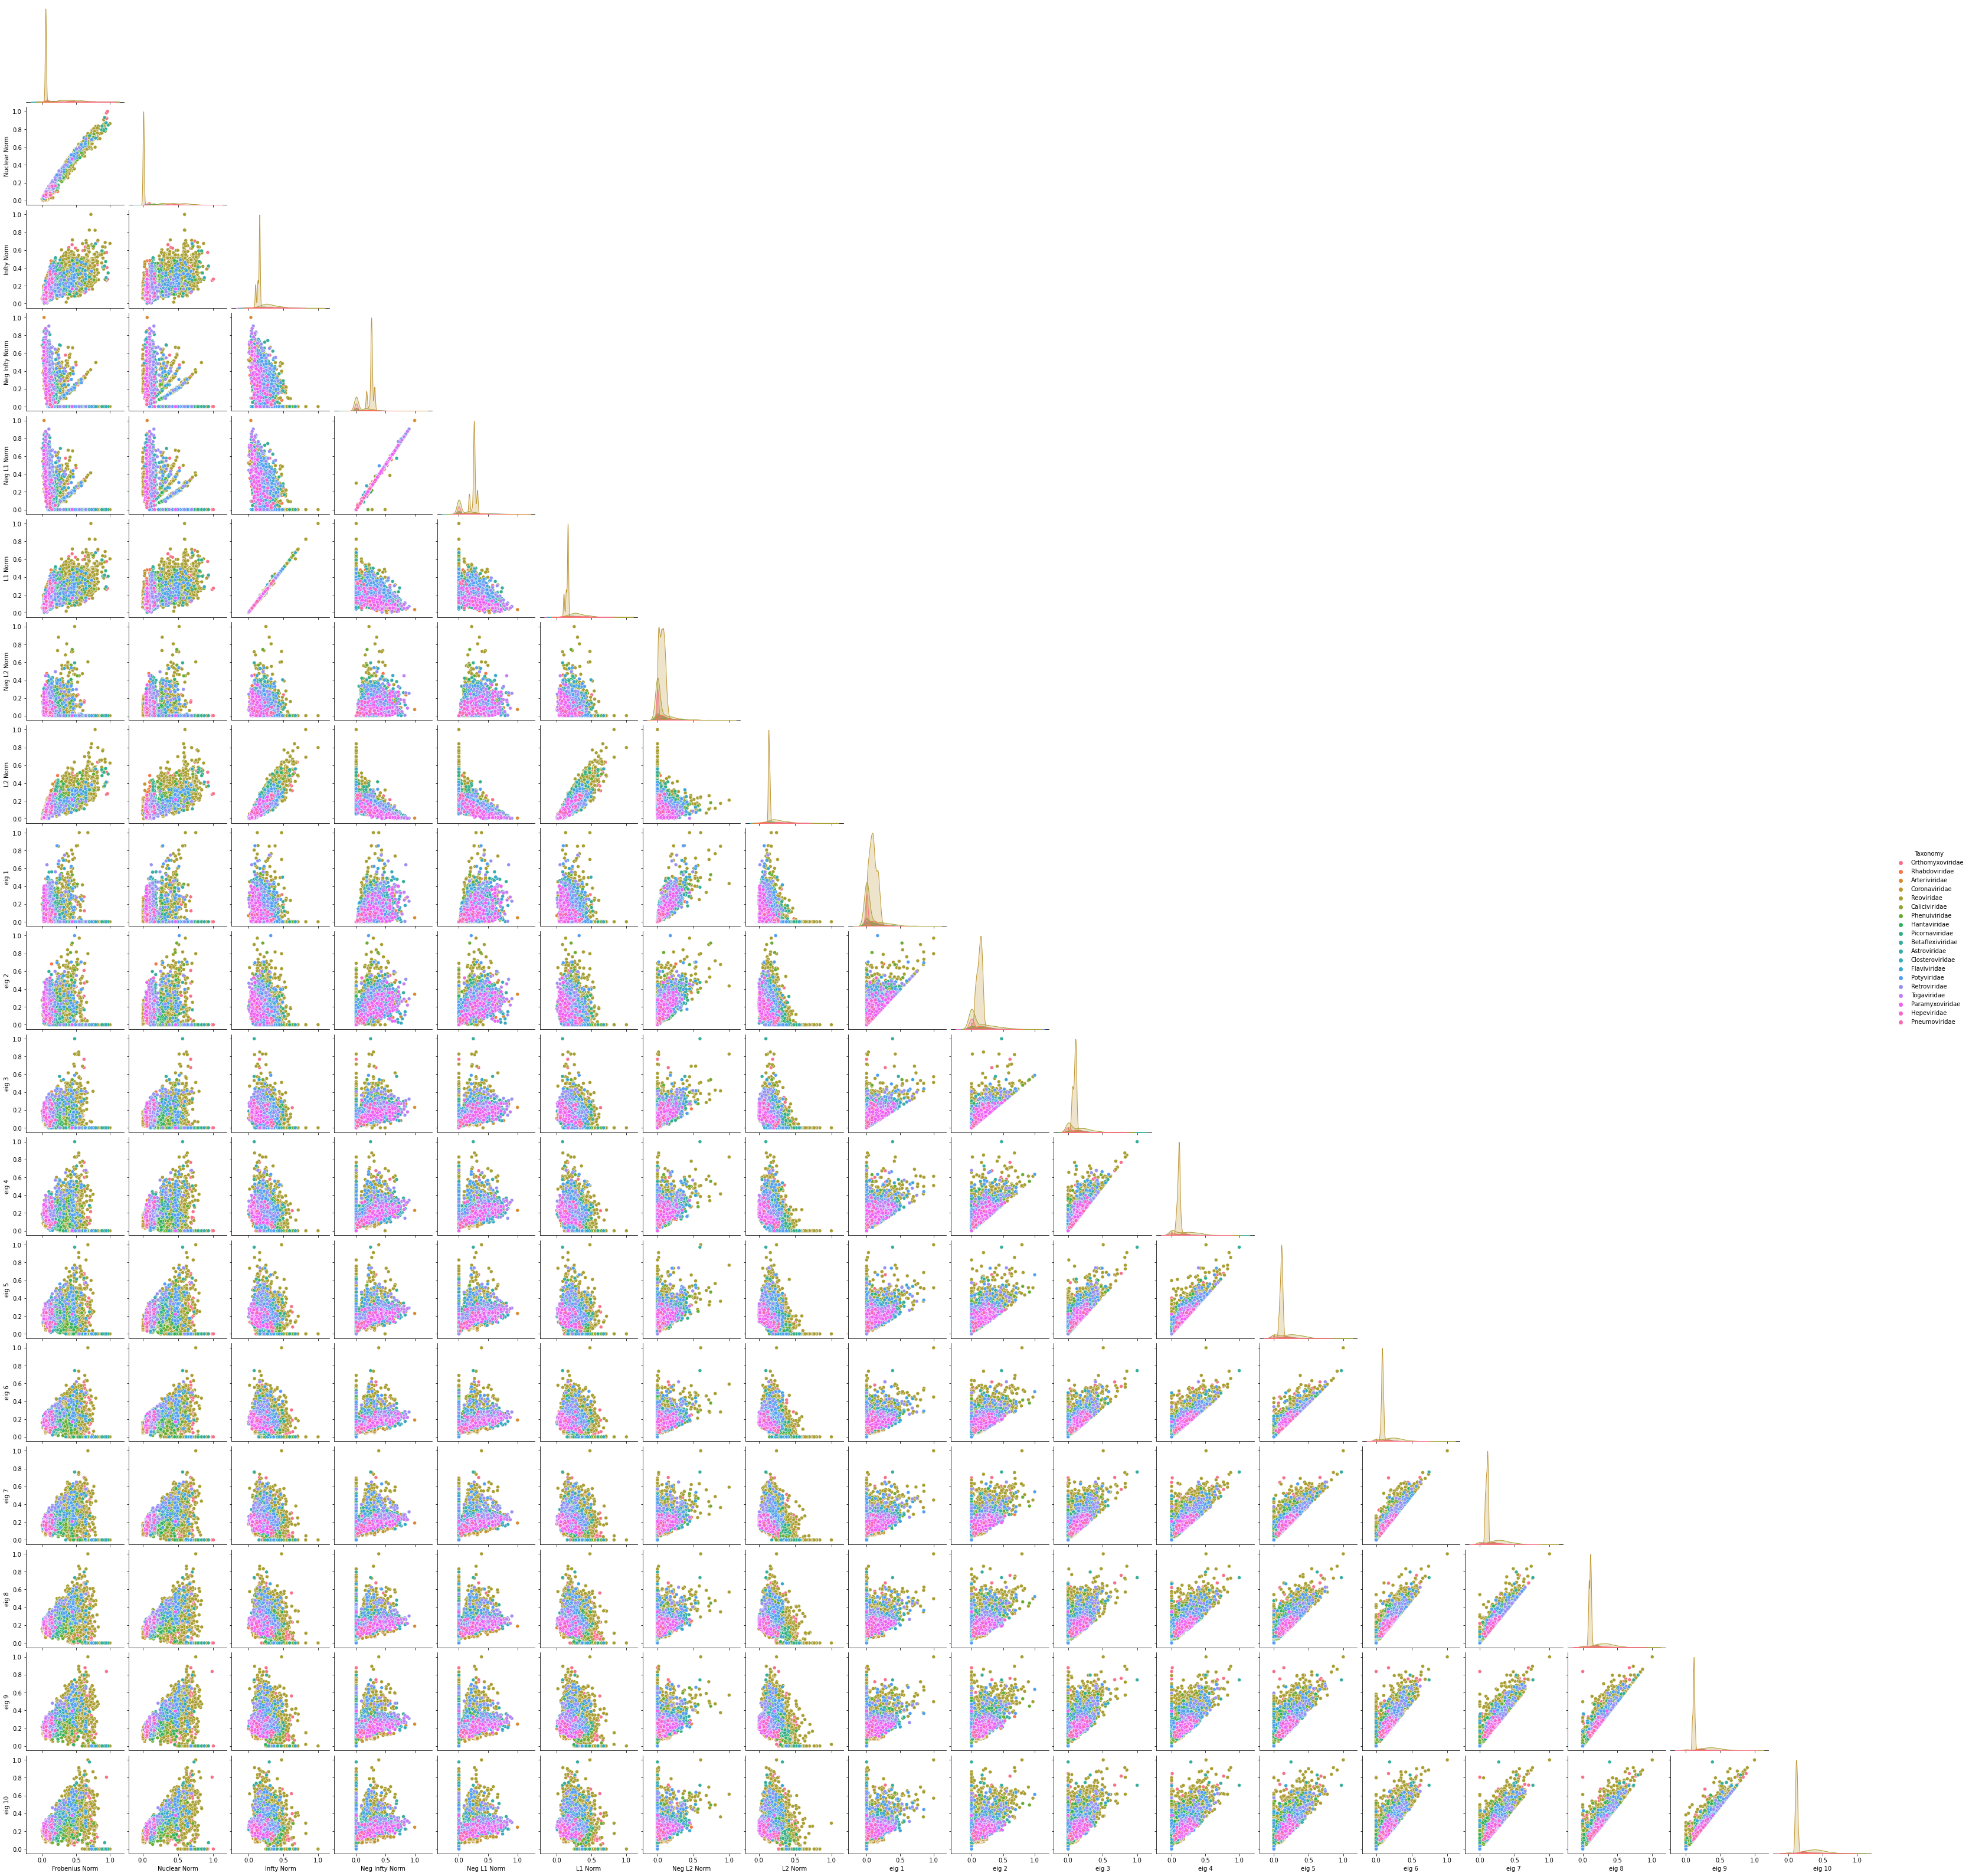

In [ ]:
sns.pairplot(data=df, hue='Taxonomy', corner=True)
plt.show()

# Random Forest Model

## Training

In [ ]:
X = df.drop(['Taxonomy'], axis=1)
y = df['Taxonomy']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
forest = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_features='sqrt',
    max_depth=30,
    bootstrap=True
)

In [ ]:
forest.fit(X_train_std, y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt')

## Testing

In [ ]:
train_score = forest.score(X_train_std, y_train)
val_score = forest.score(X_test_std, y_test)

if val_score > best_score:
  best_score = val_score
  export_model(forest)

print('Best Score:', 100*best_score,'%')

Best Score: 95.2634379989356 %


In [ ]:
print('Score on Training Set: ',round(100*train_score),'%')
print('Score on Test Set: ',round(100*val_score,2),'%')

# Results



## Cross Validation

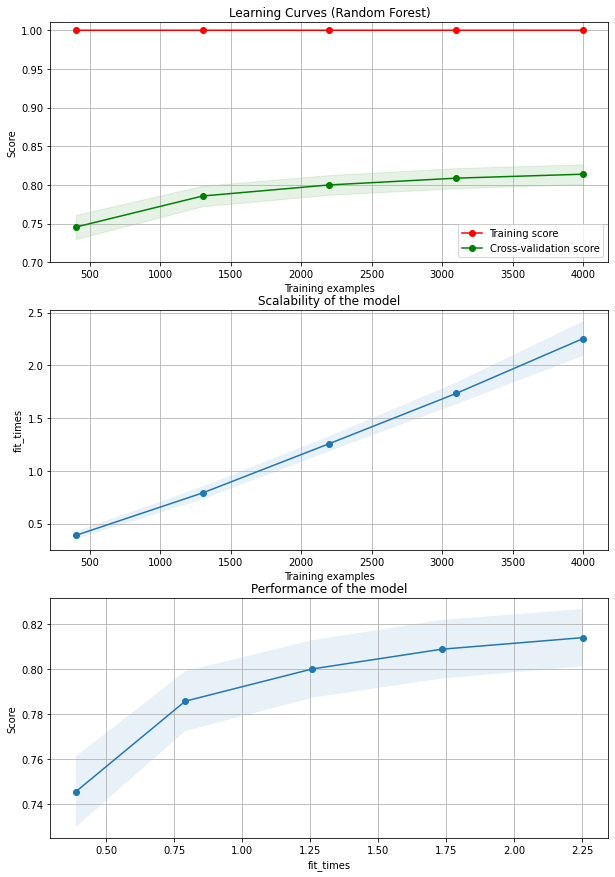

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves (Random Forest)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = forest
plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=axes,
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

plt.show()

In [ ]:
fig.savefig('/content/drive/MyDrive/Grupo-ai-Medicos/Results/learning_curves.png', dpi=100)

In [ ]:
# Graficar Region de decisión
X_combined = np.vstack((X_train_std[['Frobenius Norm', 'eig 1']], X_test_std[['Frobenius Norm', 'eig 1']]))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, 
                      classifier = forest,
                      test_idx = range(105, 150))

plt.xlabel('Frobenius Norm')
plt.ylabel('First eigenvalue')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Confusion Matrix

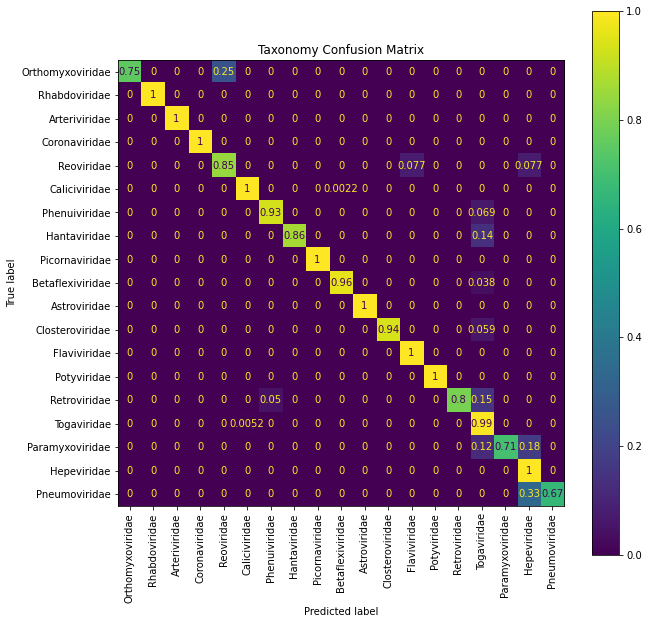

In [ ]:
y_pred = forest.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred, normalize='true')
plot_cmat(cm, taxonomies)

# Model export

In [ ]:
def export_model(model):
  joblib.dump(model, '/content/drive/MyDrive/Grupo-ai-Medicos/Results/random_forest_model.pkl')

# Model import

In [ ]:
forest = joblib.load('/content/drive/MyDrive/Grupo-ai-Medicos/Results/random_forest_model.pkl')

# Make Predictions

In [ ]:
taxonomies

0      Orthomyxoviridae
13        Rhabdoviridae
16        Arteriviridae
18        Coronaviridae
25           Reoviridae
26        Caliciviridae
36        Phenuiviridae
44         Hantaviridae
47       Picornaviridae
51     Betaflexiviridae
58         Astroviridae
62      Closteroviridae
65         Flaviviridae
76          Potyviridae
132        Retroviridae
148         Togaviridae
185     Paramyxoviridae
281         Hepeviridae
303       Pneumoviridae
Name: Taxonomy, dtype: object

In [ ]:
correct_taxonomy = 'Orthomyxoviridae'
arn_seq = ''.join(list(tax_data['Orthomyxoviridae'])[4])
print('ARN-Sequence: \n',arn_seq,'\n \n', 'Taxonomy: ', correct_taxonomy)

ARN-Sequence: 
 AGCAATCACAGCTCAGTGATCGAGACAATTAAACATTCCAACCATGGCAAACGCACCTAGGAAACCCCCAATACTCAGCGTGCCAGGTCCATCCGGTGGTAAACTTAAGTGTGCCACAGTGAACTATACGCAAGCAACCCACCAATTGATGTCTCTCACCGGTGACGTATTAAGAATCTTGGAGAAGAGGGACTCTGCTATTTCAGTGGAAGCCCGTGTAAAGGTCGTCGCCCTTAGGGATGCGTTTTACACTGATCTTCTCCCGGCTACAAACTGCGCTGAAGTCAAAAAGATACTTACAAACTTTGGAACCGCCATCATGTCCGTCATGGTGTCGCGGACGAATCCAGTGTACGGCTCTGCTCTCGACCCCCTTCAGGCAATCCTGATAAGATTCGCACAGGTTAACGCAGAGATTCCCGGCCTTCCCGACTGCCCTGTATGCACTTAGGTGCCTGGAAAAATATTTCTATTAGTTGCATGTCTGTTTTCTTTCTGGAAAAATGAGCTTGTGATTGC 
 
 Taxonomy:  Orthomyxoviridae


In [ ]:
classify(
    model =forest, 
    max_scaler=scaler, 
    std_scaler=sc, 
    arn_seq=arn_seq, 
    taxonomies=list(taxonomies), 
    codons=codons
    )

Predicted taxonomy:  Orthomyxoviridae
